# Análise do corpus, pipeline e Bag of Words

Neste notebook sera a análise de todo o corpus e também serão feitas as transformações básicas no dataset. 
O objetivo com este notebook é analisar todos os dados e gerar um csv que já contém todo o texto tokenizado e sem stop words. Além disso, sera gerado o resultado do modelo Bag of Words.
Na imagem abaixo, contém um diagrama de como essas etapas funcionam e no decorrer do notebook será entrado em mais detalhes sobre cada etapa específica.

## Análise do corpus

### Importando bibliotecas

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
   pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import nltk
import string  
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Abrindo a base de dados 
df = pd.read_excel('../base/base.xlsx', index_col=0)
df_initialprocessing = pd.read_csv('../output/TratamentoInicial.csv')
df_tokenizationStopWords = pd.read_csv('../output/ResultadoProcessamento.csv')
df_bagOfWords = pd.read_csv('../output/ResultadoBow.csv')
df_processada = pd.read_csv('../output/cleaning_output.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../output/ResultadoProcessamento.csv'

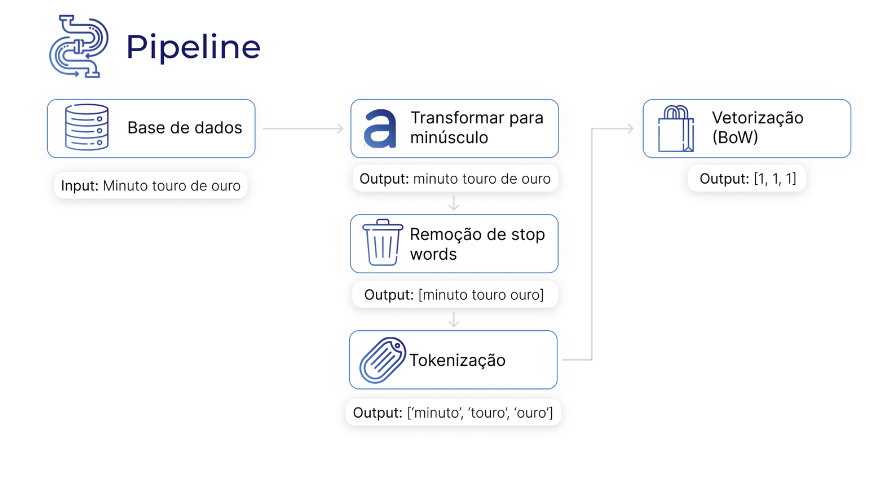

Análise da porcentagem dos comentários do BTG Pactual em relação aos outros comentários dos usuários no Instagram.

In [ ]:
# Contagem de comentários feitos pelo BTG Pactual
num_comments_btg = len(df[df['"autor"'] == 'btgpactual'])

# Contagem de comentários feitos por outros usuários
num_comments_others = len(df[df['"autor"'] != 'btgpactual'])

# Cálculo das porcentagens
total_comments = num_comments_btg + num_comments_others
btg_percentage = (num_comments_btg / total_comments) * 100
others_percentage = (num_comments_others / total_comments) * 100


# Definindo as cores
colors = ['#195AB4', '#CFCFCF']

# Criação do gráfico de pizza
labels = ['BTG Pactual', 'Outros']
sizes = [btg_percentage, others_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, colors=colors)
ax1.axis('equal')
ax1.set_title('Porcentagem da distribuição de comentários do BTG Pactual (@btgpactual) \n vs outros usuários do Instagram')
ax1.legend(title='Categorias', loc='center right', bbox_to_anchor=(1.3, 0.1))
plt.show()

Análise da quantidade de palavras após cada etapa do pré-processamento:



In [ ]:
# Base original fornecida pelo BTG Pactual (df)
df['Num Words'] = df['"texto"'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' da base original: ", df['"texto"'].str.split().str.len().sum())

# Base após remoção dos comentários do BTG Pactual (df_tratamentoInicial)
df_initialprocessing['Num Words'] = df_initialprocessing['texto'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' - dfClean: ", df_initialprocessing['texto'].str.split().str.len().sum())

# Base após tokenização e remoção de stopwords (df_tokenizaçãoStopWords)
df_tokenizationStopWords['Num Words'] = df_tokenizationStopWords['Frases_sem_stop_words'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' - df_semstopwords: ", df_tokenizationStopWords['Frases_sem_stop_words'].str.split().str.len().sum())

# Base após bag of words (df_bagOfWords)
df_bagOfWords['Num Words'] = df_bagOfWords['Palavra'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'Palavra' - df_final: ", df_bagOfWords['Palavra'].str.split().str.len().sum())


### Gráfico dos resultados das palavras após cada etapa do pré-processamento.


In [ ]:

df_initialprocessing
df_tokenizationStopWords
df_bagOfWords

In [ ]:
# Definindo a quantidade de palavras em cada base
word_count = [df['"texto"'].str.split().apply(len).sum(),
              df_initialprocessing['texto'].str.split().apply(len).sum(),
              df_tokenizationStopWords['Frases_sem_stop_words'].str.split().apply(len).sum(),
              df_bagOfWords['Palavra'].str.split().apply(len).sum()]

# Definindo os rótulos para cada pré-processamento
labels = ['Base Original', 'Limpeza Inicial', 'Tokenização e Remoção Stop Words', 'Bag of Words']

# Criando um gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(labels, word_count)

# Adicionando rótulos aos eixos e título ao gráfico
ax.set_xlabel('ETAPAS DO PRÉ-PROCESSAMENTO')
ax.set_ylabel('QUANTIDADE DE PALAVRAS')
ax.set_title('Quantidade de palavras na coluna referente aos comentários \n dos clientes após cada etapa de pré-processamento')

# Adicionando os números de palavras acima de cada barra
for i, v in enumerate(word_count):
    ax.text(i, v + 10000, str(v), ha='center')

colors = ['#001E62', '#0A1E8C', '#195AB4', '#418FDE']
ax.bar(labels, word_count, color=colors)

# Mostrando o gráfico
plt.show()


### Análise do número de linhas e colunas da primeira e da última base.



In [ ]:
# quantidade de linhas e colunas em df
num_rows_df = df.shape[0]
num_columns_df = df.shape[1]

# quantidade de linhas e colunas em df_bagOfWords
num_rows_df_final = df_bagOfWords.shape[0]
num_columns_df_final = df_bagOfWords.shape[1]

# Gráfico de barras para as linhas
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # define o tamanho da figura
rects1 = ax.bar(['Base Inicial', 'Base Final'], [num_rows_df, num_rows_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Comparação do número de linhas')
ax.set_ylabel('Número de linhas')

# Adiciona o número respectivo em cima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.1),  # desloca o texto 0.1 pontos acima
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

# Gráfico de barras para as colunas
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # define o tamanho da figura
rects2 = ax.bar(['Base Inicial', 'Base Final'], [num_columns_df, num_columns_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Comparação do número de colunas')
ax.set_ylabel('Número de colunas')

# Adiciona o número respectivo em cima de cada barra
autolabel(rects2)
plt.show()


In [ ]:
# quantidade de linhas e colunas em df
num_rows_df = df.shape[0]
num_columns_df = df.shape[1]

# quantidade de linhas e colunas em df_bagOfWords
num_rows_df_final = df_bagOfWords.shape[0]
num_columns_df_final = df_bagOfWords.shape[1]

# Gráfico de barras para as linhas
fig, ax = plt.subplots()
rects1 = ax.bar(['Base Inicial', 'Base Final'], [num_rows_df, num_rows_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Comparação do número de linhas')
ax.set_ylabel('Número de linhas')

# Adiciona o número respectivo em cima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # desloca o texto 3 pontos acima
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

# Gráfico de barras para as colunas
fig, ax = plt.subplots()
rects2 = ax.bar(['Base Inicial', 'Base Final'], [num_columns_df, num_columns_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Comparação do número de colunas')
ax.set_ylabel('Número de colunas')

# Adiciona o número respectivo em cima de cada barra
autolabel(rects2)
plt.show()


## Hipóteses do grupo de colunas que afetem e não afetam a análise dos sentimentos dos cliente.



### Colunas que não afetam na análise de sentimento:

Colunas que não afetam na análise de sentimento:
Segundo nossas hipóteses, as colunas que podem não estar relacionadas a verificação do sentimento dos clientes do BTG Pactual através dos comentários são:

- **id :** esta informação não tem relação direta com o sentimento do cliente e não ajudará a entender sua opinião sobre seus produtos ou serviços.

- **Autor :** informação não diretamente relacionada ao sentimento do cliente, a menos que haja uma hipótese específica sobre isso.

- **Tipo de Interação :** informação não diretamente relacionada ao sentimento do cliente e não ajudará a entender sua opinião sobre seus produtos ou serviços.

- **Link do post :** informação não diretamente relacionada ao sentimento do cliente e não ajudará a entender sua opinião sobre seus produtos ou serviços.

- **Processado :** Esta coluna pode ser relevante dependendo do seu objetivo de análise. Se a coluna indicar se um comentário foi processado por um software de análise de sentimento, por exemplo, ela pode ser útil para entender a precisão dos resultados da análise.

- **Contém Hyperlink :** informação não diretamente relacionada ao sentimento do cliente e não ajudará a entender sua opinião sobre seus produtos ou serviços.

- **Probabilidade de anomalia :** Esta coluna pode ser relevante dependendo do seu objetivo de análise. Se a coluna indicar a probabilidade de um comentário ser uma anomalia, ela pode ser útil para entender a qualidade geral dos dados.

### Colunas que tem relação direta com o resultado da análise de sentimento dos clientes:


Já as colunas que podem ter relação direta com

- **Texto :** Esta é a coluna mais importante, pois contém o feedback direto dos clientes sobre seus produtos ou serviços.

- **Data da Publicação :** A data pode ser útil para detectar tendências temporais e mudanças na percepção do cliente ao longo do tempo.

- **Sentimento :** Esta coluna é importante, pois é onde está registrado o sentimento do cliente em relação ao produto ou serviço.

### Gráfico das colunas relevantes e irrelevantes segundo hipóteses feitas pelo grupo.



In [ ]:

# Definir os dados do gráfico
columns = ['Texto', 'Data da Publicação', 'Sentimento', 'id', 'Autor', 'Tipo de Interação', 'Link do post', 'Processado', 'Contém Hyperlink', 'Probabilidade de anomalia']
relevant_quantity = [3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
irrelevant_quantity = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(columns, relevant_quantity, color='green', label='Colunas relevantes')
ax.bar(columns, irrelevant_quantity, bottom=relevant_quantity, color='red', label='Colunas irrelevantes')
ax.set_xticklabels(columns, rotation=90)
ax.set_ylabel('Quantidade de colunas')
ax.legend()

plt.show()

In [ ]:
# Contagem de sentimentos
fellings = df_tokenizationStopWords['sentimento'].value_counts()
print(fellings)

# Contagem de palavras na primeira base "df"
words_df = df['"texto"'].str.split().apply(len).sum()
print("Número total de palavras nos comentários da base inicial:", words_df)

# Contagem de palavras na última base
words_df_tokenizaçãoStopWords = df_tokenizationStopWords['texto'].str.split().apply(len).sum()
print("Número total de palavras nos comentários da base após tratamento:", df_tokenizationStopWords)


### Porcentagem dos sentimentos dos cliente (na porcentagem de neutros há a consideração de emojis, o que torna o número impreciso).



In [ ]:
# Lista de cores
colors = ['#FFE1BE', '#8C0019', '#195AB4']

# Contagem de sentimentos
fellings = df_tokenizationStopWords['sentimento'].value_counts()

# Cria um gráfico de pizza com as contagens de sentimentos
fig, ax = plt.subplots()
ax.pie(fellings.values, labels=fellings.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.title('Porcentagem relacionada aos sentimentos nos comentários \n das postagens no Instagram feitos pelos clientes do BTG Pactual')

# Mostra o gráfico
plt.show()

Função "describe" da base de dados inicial.



In [ ]:
df.describe()


In [ ]:
# Ordena as palavras em ordem decrescente pela frequência e seleciona as 20 primeiras
top_words = df_bagOfWords.sort_values(by='Frequência', ascending=False)['Palavra'].head(20).tolist()

# Imprime as 20 palavras mais frequentes
print('As 20 palavras mais frequentes são: ', top_words)

## Importando as bibliotecas 

Nesta etapa são importadas e baixadas as bibliotecas e pacotes das mesmas, necessárias para as análises, gráficos, funções e para gerar o modelo Bag of Words.

In [ ]:
pip install openpyxl


In [ ]:
pip install scikit-learn

In [ ]:
pip install keras

In [ ]:
 pip install tensorflow

In [ ]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
nltk.download('punkt') 
nltk.download('stopwords') 

### Processamento dos dados 

### Importando a planilha 

Nesta váriavel é feito a importação da planilha que sera utilizada para gerar o bag of words

In [ ]:
# Abrindo a base de dados 
df = pd.read_excel('../base/base.xlsx', index_col=0)

### Pré processamento dos dados 

Nesta etapa o foco é limpar da base de dados os dados que não serão utilizados.
Portanto, com essa função são removidos todos os comentários que tenham autoria do BTG Pactual e fotos de terceiros que marcavam a companhia.


In [ ]:
# Esta função remove os dados que não serão utilizados para a análise
def clean_data(df):
    # Remove as aspas dos nomes das colunas
    df = df.rename(columns=lambda x: x.replace('\"', ''))
    # Remove comentários feito pelo btg
    dfWithoutAutor = df[df["autor"] != "btgpactual"]
    # Remove comentários nulos
    dfWithoutNull = dfWithoutAutor[dfWithoutAutor["autor"].notnull()]
    # Deixando apenas as interações do tipo comentário e resposta
    dfFinal = dfWithoutNull.loc[(dfWithoutNull['tipoInteracao'] == 'comentário') | (dfWithoutNull['tipoInteracao'] == 'resposta')]
    return dfFinal

#### Caso de teste

In [ ]:
# Criando um data frame de teste para validar o pré processamento
data_test = {'id': [1, 2, 3, 4, 5],
             'dataPublicada': ['03/01/2022', '03/04/2022', '03/07/2022', '03/10/2022', '31/12/2022'],
             'autor': ['btgpactual', 'robert87', 'grace46', 'william25', 'john23'],
             'texto': ["Obrigado, 🚀🚀💙", "Bom dia, gostaria de saber como faço pra conseguir falar com um atendente humanizado no chat do btg banking?", 
                       "Bom dia, preciso urgente do meu informe de rendimentos do BTLG11, para declaração do meu IR. Já enviei vários e-mails e até o momento sem resposta. Telefone ninguém atende. Como faço?", "Pessoal, sempre muito bom mas se eu puder solicitar uma coisa seria legendas 😅", "Sempre é aproveitoso parar o q tá fazendo para ouvi-lo"],
             'sentimento': ['NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'POSITIVE'],
             'tipoInteracao': ["comentário", "comentário", "comentário", "marcação", "comentário"],
             'anomalia': [1, 0, 0, 1, 1],
             'probabilidadeAnomalia': [100, 20, 30, 100, 100],
             'linkPost': ['https://www.instagram.com/p/CapXhB5Lvas/#17935401550894179', 'https://www.instagram.com/p/CaqBiRpsYLm/', 'https://www.instagram.com/p/CaqBiRpsYLm/', 'https://www.instagram.com/p/CapXhB5Lvas/#17926096268158628', 'https://www.instagram.com/p/CaR1j2TuPpD/#17914683365221503'],
             'processado': [0,0,0,1,1],
             'contemHyperlink': [0,0,0,1,1]}
               
df_testing = pd.DataFrame(data_test)


In [ ]:
# Testando a função
clean_data_test = df_testing
cleaning_test = clean_data(clean_data_test)

Os resultados foram colocados em células separadas para facilitar a visualização.

In [ ]:
# Entrada do caso de teste
clean_data_test

In [ ]:
# Resultado do caso de teste
cleaning_test

##### Demonstração da função 

Nesta etapa será demonstrado o funcionamento da função na base de dados real 

In [ ]:
cleaning_output = clean_data(df)
cleaning_output

### Processamento dos dados

Nesta etapa as frases são tokenizadas (cada palavra da frase é dividida, sendo 1 palavra = 1 token) e removidas as stop words, palavras que não acrescentam significado semântico relevante (e.g: de, para, ou). Além disso, é gerado uma nova coluna que contém os tratamento citados acima aplicado aos comentários (coluna 'texto'). 


In [ ]:
def processing_comments(frase):
    #divide as frases em palavras
    palavras = frase.split() 
    #coloca todas as letras em minúsculas (lower) e remove as stop words
    filtered_words = [word for word in palavras if word.lower() not in stop_words
                        and not word.startswith('@') and word.isalpha()] 
    #tokeniza as palavras e organiza cada comentário em uma lista de palavras
    tokens = word_tokenize(" ".join(filtered_words)) 
    return tokens

#### Caso de teste

In [ ]:
# Testando a função 
processing_test = cleaning_test['texto']
tokenize_test = processing_test.apply(processing_comments)

In [ ]:
# Input da função
processing_test

In [ ]:
# Resultado da função
tokenize_test

##### Demonstração da função 

Nesta etapa será demonstrado o funcionamento da função na base de dados real 

In [ ]:
processing_output = cleaning_output['texto'].apply(processing_comments)
processing_output

### Aplicação do modelo 

Durante esta etapa é feita a implementação do modelo Bag of Words, que vetoriza as palavras e faz a contagem de vezes que cada uma aparece na coluna a ser utilizada. Assim, tendo como resultado um dataframe com as palavras que mais aparecem no texto e sua respectiva frequência.

In [ ]:
def bow_dataframe(inputUser):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(inputUser)
    # Com essa variavel é possível ver as palavras e contar sua frequência
    wordCount = tokenizer.word_counts    
    dfCountBoW = pd.DataFrame(list(wordCount.items()))
    dfCountBoW.rename(columns={0: "Palavra", 1:"Frequência"}, inplace=True)
    final_df = dfCountBoW.sort_values(by=['Frequência'], ascending=False)
    return final_df

#### Caso de teste

In [ ]:
# Testando a função 
bow_test = tokenize_test
bow_test_result = bow_dataframe(tokenize_test)

In [ ]:
# Input da função
tokenize_test

In [ ]:
# Output da função
bow_test_result.head(5)

##### Demonstração da função 

Nesta etapa será demonstrado o funcionamento da função na base de dados real 

In [ ]:
result_output = bow_dataframe(processing_output)
result_output.head(10)

### Pipeline de processamento completo

Nesta etapa há todo o processamento da planilha em apenas uma função que retorna um csv completo das palavras já tokenizadas.

In [ ]:
#Função para rodar nosso modelo de bag of words, essa função recebe um dataframe
def pipeline(base):
    #limpeza da base de dados
    base1 = clean_data(base)
    #tokenização da coluna de textos
    base1['Frases_sem_stop_words'] = base1['texto'].apply(processing_comments)
    return base1
    

#### Caso de teste

In [ ]:
#Entrada
df_testing

In [ ]:
# Resultado da função Pipeline
pipeline_output_test = pipeline(df_testing)
pipeline_output_test

#### Baixar o resultado do modelo 

##### Demonstração da função 

Nesta etapa sera gerado o resultado da função e retornando todo o tratamento da base

In [ ]:
result_pipeline = pipeline(df)
result_pipeline

In [ ]:
# Para salvar o resultado final basta apenas descomentar a linha a seguir
#result_pipeline.to_csv('..\\output\\Resultado-Processamento.csv',encoding='utf-8', index=False, header=True, )

### Resultado completo

Com todas etapas já feitas previamente, agora é a hora de rodar a limpeza dos dados e ter o resultado do bag of words.

In [ ]:
# Limpando os dados originais
cleaned_df = pipeline(df)

In [ ]:
# Resultado Bag of Words
result_final = bow_dataframe(cleaned_df['Frases_sem_stop_words'])
result_final.head(10)

In [ ]:
cleaned_df['Frases_sem_stop_words'] = cleaned_df['Frases_sem_stop_words'].apply(lambda x: [word.lower() for word in x])
cleaned_df

In [ ]:
# df_processada['tokens_processados']
# df_processada['tokens_processados'] = df_processada['tokens_processados'].apply(lambda x: x.replace("'", ""))

# df_processada

In [ ]:

def train_word2vec_model(cleaned_df):
    # Treinar o modelo Word2Vec
    model = Word2Vec(cleaned_df['Frases_sem_stop_words'], min_count=1)

    # Criar um DataFrame com as palavras e seus vetores
    word_vectors = pd.DataFrame(model.wv.index_to_key, columns=['word'])
    word_vectors['vector'] = word_vectors['word'].apply(lambda x: model.wv[x])

    return word_vectors

In [ ]:
def create_sentence_vector(model, cleaned_df):
    sentence_table = []
    for sentence in cleaned_df['Frases_sem_stop_words']:
        word_vectors = [model.wv[word] for word in sentence if word in model.wv]
        if len(word_vectors) > 0:
            sentence_vector = sum(word_vectors) / len(word_vectors)
        else:
            sentence_vector = [None] * 100  # Cria uma lista de 100 elementos None
        sentence_table.append((sentence, *sentence_vector[:50]))  # Adiciona apenas os primeiros 50 elementos do vetor

    column_labels = ['Frase']
    for i in range(50):
        column_labels.append(f'Vetor{i+1}')
    df_vec = pd.DataFrame(sentence_table, columns=column_labels)

    cleaned_df["sentimentoNumerico"] = cleaned_df["sentimento"].replace({'NEGATIVE': -1, 'POSITIVE': 1, 'NEUTRAL': 0})

    # Definir o índice do DataFrame df_vec como o mesmo índice de df_processada['sentimentoNumerico']
    df_vec.set_index(cleaned_df["sentimentoNumerico"].index, inplace=True)

    df_vec['sentimento'] = cleaned_df["sentimentoNumerico"]
    df_vec = df_vec.dropna()

    return df_vec

In [ ]:
df_vec = create_sentence_vector(model, cleaned_df)
df_vec

In [ ]:

df_vec.to_csv('..\\output\\word2veec.csv',encoding='utf-8', index=False, header=True, )